In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats # for QQplot

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score

## Reading data

In [2]:
# Use only:
# GrLivArea (above ground square footage)
# BedroomAbvGr
# FullBath

# Target: SalePrice

df=pd.read_csv("train.csv", usecols=["GrLivArea", "BedroomAbvGr", "FullBath", "SalePrice"])
df.head()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
0,1710,2,3,208500
1,1262,2,3,181500
2,1786,2,3,223500
3,1717,1,3,140000
4,2198,2,4,250000


## EDA

In [3]:
df.isnull().sum() # checking for null values

GrLivArea       0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [4]:
df.shape

(1460, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [6]:
df.describe()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,2.866438,180921.195890
std,525.480383,0.550916,0.815778,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1.000000,2.000000,129975.000000
50%,1464.000000,2.000000,3.000000,163000.000000
75%,1776.750000,2.000000,3.000000,214000.000000
max,5642.000000,3.000000,8.000000,755000.000000


<Axes: >

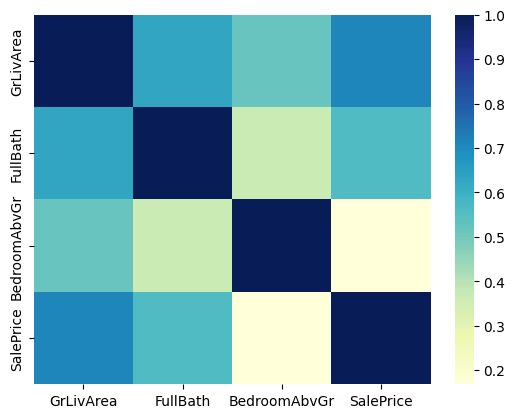

In [7]:
sns.heatmap(df.corr(), cmap='YlGnBu')

## Train_Test_Split

In [8]:
# train_test_split

X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=42)

In [9]:
X_train

,GrLivArea,FullBath,BedroomAbvGr
254,1314,1,3
1066,1571,2,3
638,796,1,2
799,1768,1,3
380,1691,2,3
...,...,...,...
1095,1314,2,3
1130,1981,2,4
1294,864,1,2
860,1426,1,3


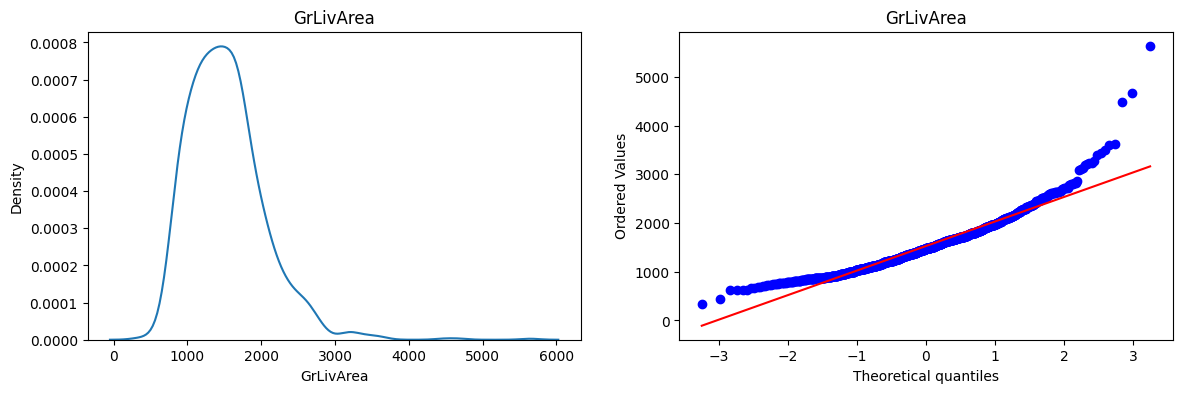

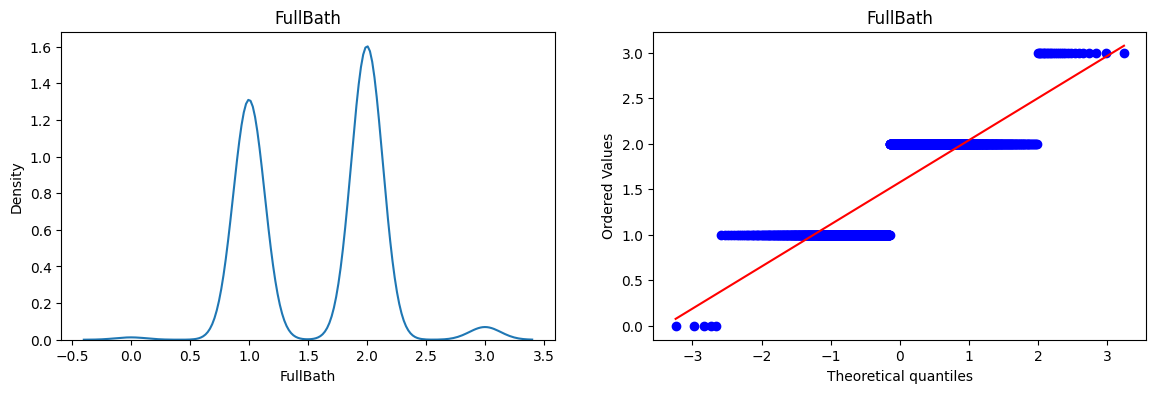

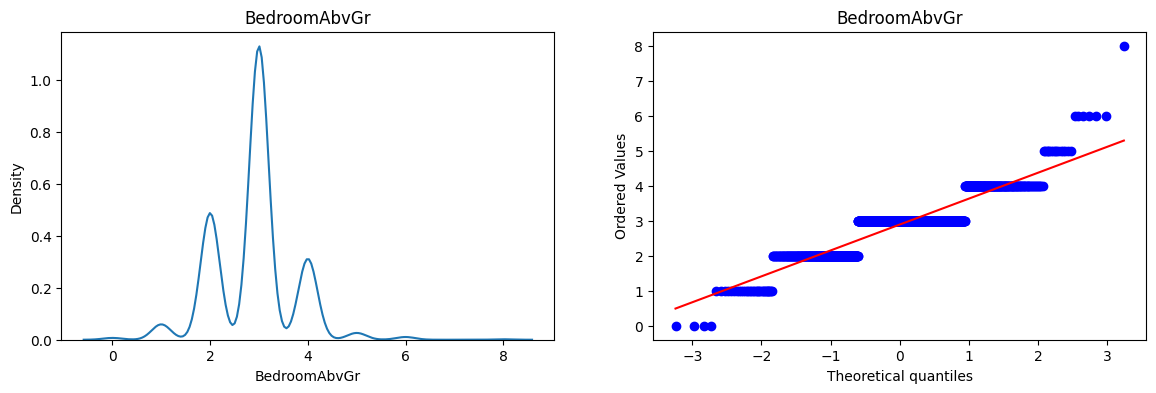

In [10]:
# checking for Normal distribution
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt) # for QQplot
    plt.title(col)
    
    plt.show()

In [11]:
# Power transformation
# Standard scaling
# Linear Regression as the model

## Preprocessing

In [12]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('power', PowerTransformer(), [1, 2]), # which columns are not in Normal distribution, transformed using Yeo-Johnson Transformer
    ('scale', StandardScaler(), [0, 1, 2])
], remainder='passthrough')

In [13]:
# pipe
pipe=Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

## Model training and Output prediction

In [14]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power', PowerTransformer(),
                                                  [1, 2]),
                                                 ('scale', StandardScaler(),
                                                  [0, 1, 2])])),
                ('model', LinearRegression())])

In [15]:
y_pred=pipe.predict(X_test)
y_pred

array([115350.13309603, 304665.63277325, 135875.91282783, 205490.72128981,
       225602.40953316, 113318.90684414, 207071.3977874 , 183957.96389048,
       113318.90684414, 148995.06653248, 186131.94420484,  95266.69590627,
       122003.8479648 , 192136.27078734, 208182.31596472, 133805.45538558,
       211288.00212809, 146849.33727171, 134219.54687403, 186338.98994906,
       219880.4005134 , 197830.02875351, 186028.42133272, 126351.80859351,
       181369.89208768, 182019.28037394, 171949.31072547, 118898.16180143,
       199279.34896308, 197858.2798071 , 134398.34156467, 245036.45843665,
       402060.32609645, 128008.1745473 , 202592.08087067, 122389.68839966,
       201895.25418179, 203842.26478071, 232810.47569369, 120761.57349945,
       126530.60328414, 251661.92225183, 103134.43418679, 244622.3669482 ,
       107068.30332706, 200718.38533892, 123867.25966282, 103652.04854736,
       270917.17646469, 162556.56277917, 107068.30332706, 220115.69731121,
       139781.5309145 , 3

In [16]:
# accuracy score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("r2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2784593468.0554204
r2 Score: 0.6369654441233222


In [17]:
np.mean(cross_val_score(pipe, df.drop(columns=['SalePrice']), df['SalePrice'], cv=10, scoring='r2'))

np.float64(0.5762444927310277)

## Exporting the Pipeline

In [18]:
#export
import pickle
pickle.dump(pipe,open('price_prediction_model.pkl', 'wb'))